# **Machine Learning Project: Predicting CO2 Emissions using Multiple Linear Regression**


## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Load Data

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)

## Data Overview

In [ ]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1044,2014,VOLKSWAGEN,PASSAT,MID-SIZE,1.8,4,M5,X,10.0,6.9,8.6,33,198
173,2014,CADILLAC,CTS-V COUPE,MID-SIZE,6.2,8,AS6,Z,19.7,12.9,16.6,17,382
1011,2014,TOYOTA,VENZA 4WD,SUV - SMALL,3.5,6,AS6,X,12.9,9.4,11.3,25,260
969,2014,TOYOTA,CAMRY,MID-SIZE,3.5,6,AS6,X,11.1,7.8,9.6,29,221
791,2014,MINI,COOPER ROADSTER,TWO-SEATER,1.6,4,M6,Z,8.6,6.8,7.8,36,179


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
df.shape

(1067, 13)

# **Exploratory Data Analysis  and Visualization**


In [ ]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

#### Correlation matrix to explore relationships between features and CO2 emissions


In [ ]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


#### drop less useful features to keep only the most correlated ones


In [ ]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [ ]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


#### Scatter matrix to visualize feature relationships


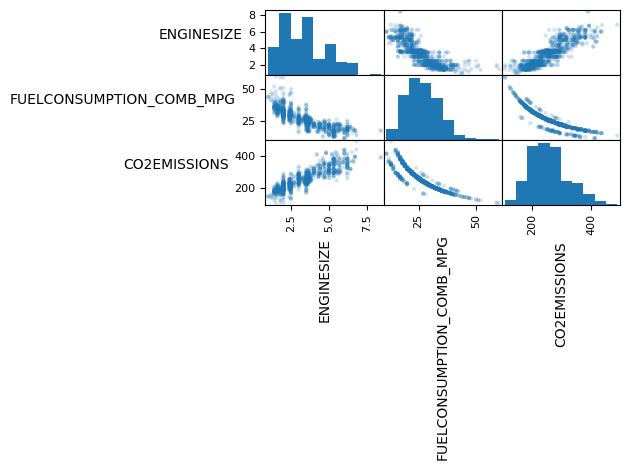

In [ ]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


# **Data Preprocessing**

#### Extract the input features and labels from the data set


In [ ]:
X = df.iloc[:, [0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

#### Standardize features to prevent bias from different magnitudes


In [ ]:
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

#### Display statistical summary of standardized features


In [ ]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


#### Create train and test datasets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

# **Build a multiple linear regression model (Before Log Transform)**


In [ ]:
# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


### Transform model coefficients back to the original feature scale


In [ ]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


## **Evaluate Model Performance (Before Log Transform)**

In [ ]:
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_percent = int(r2 * 100)

print('Evaluate Before Log Transform: ')
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R2-score: {r2_percent}")

Evaluate Before Log Transform: 
Mean absolute error: 14.29
Mean squared error: 466.11
Root mean squared error: 21.59
R2-score: 88


#### Plot actual vs predicted CO2 emissions for Engine Size and FUEL CONSUMPTION before log transform


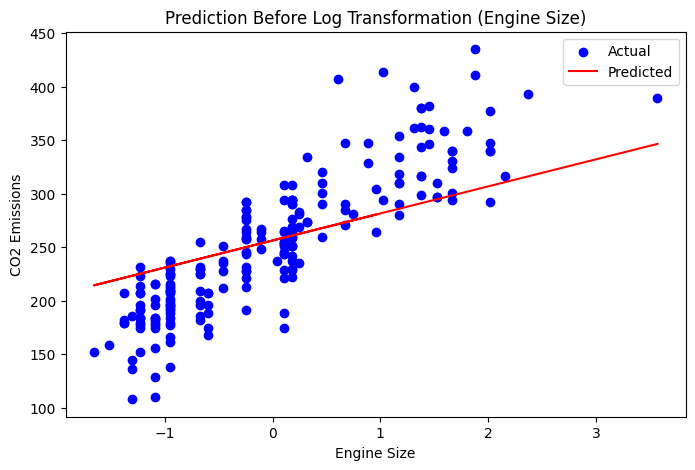

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], coef_[0][0] * X_test[:, 0] + intercept_[0], color='red', label='Predicted')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Prediction Before Log Transformation (Engine Size)")
plt.legend()
plt.savefig("prediction_before_log_engine.png", dpi=300)
plt.show()

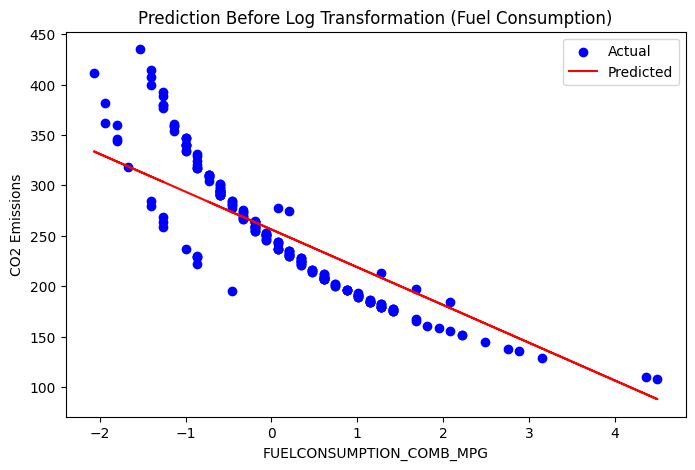

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 1], coef_[0][1] * X_test[:, 1] + intercept_[0], color='red', label='Predicted')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emissions")
plt.title("Prediction Before Log Transformation (Fuel Consumption)")
plt.legend()
plt.savefig("prediction_before_log_fuel.png", dpi=300)
plt.show()

## **Log Transformation and Re-training**

### Log-transform and standardize features to stabilize variance and scale data

In [ ]:
X_log = np.log(X + 1e-6)

std_scaler_log = preprocessing.StandardScaler()
X_log_std = std_scaler_log.fit_transform(X_log)

### Split log-scaled data into training and test sets


In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_std, y, test_size=0.2, random_state=42)

###  Create and train the linear regression model on the log-transformed data


In [ ]:
regressor_log = linear_model.LinearRegression()
regressor_log.fit(X_train_log, y_train_log)

LinearRegression()

In [ ]:
# Calculate model coefficients and intercept
means_log = std_scaler_log.mean_
std_devs_log = np.sqrt(std_scaler_log.var_)


coef_log = regressor_log.coef_
intercept_log = regressor_log.intercept_

coef_original_log = coef_log / std_devs_log
intercept_original_log = intercept_log - np.sum((means_log * coef_log) / std_devs_log)

print ('Coefficients with log transform:', coef_original_log)
print ('Intercept with log transform:', intercept_original_log)

Coefficients with log transform: [  44.9019174  -145.47301407]
Intercept with log transform: 676.8068644015361


# **Evaluate Model Performance (After Log Transform)**

#### Evaluate model errors and R2 (With Log Transformation)


In [ ]:
y_pred_log = regressor_log.predict(X_test_log)

mae_log = mean_absolute_error(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_log, y_pred_log)

print('Evaluate After Log Transform: ')
print(f"Mean absolute error: {mae_log:.2f}")
print(f"Mean squared error: {mse_log:.2f}")
print(f"Root mean squared error : {rmse_log:.2f}")
print(f"R2-score: {r2_log:.2f}")

Evaluate After Log Transform: 
Mean absolute error: 13.90
Mean squared error: 470.08
Root mean squared error : 21.68
R2-score: 0.89


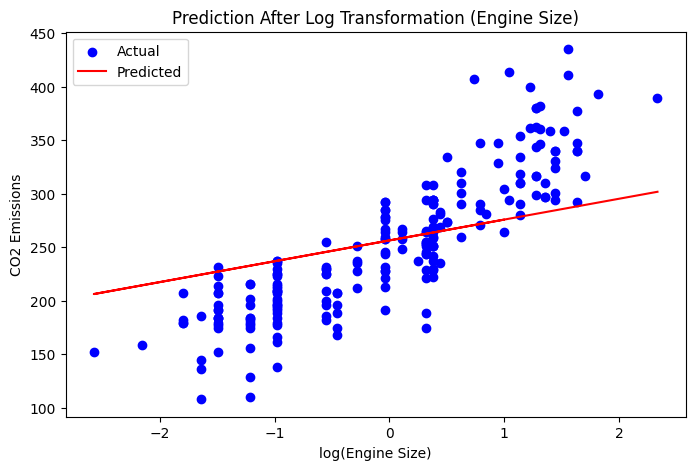

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_log[:, 0], y_test_log, color='blue', label='Actual')
plt.plot(X_test_log[:, 0], coef_log[0] * X_test_log[:, 0] + intercept_log, color='red', label='Predicted')
plt.xlabel("log(Engine Size)")
plt.ylabel("CO2 Emissions")
plt.title("Prediction After Log Transformation (Engine Size)")
plt.legend()
plt.savefig("prediction_after_log_engine.png", dpi=300)
plt.show()

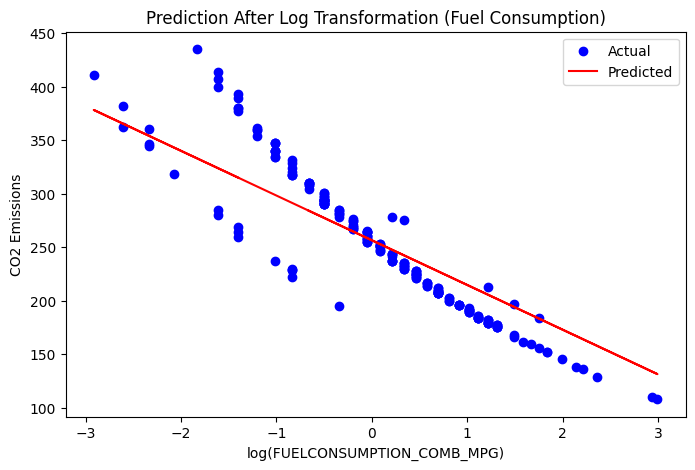

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_log[:, 1], y_test_log, color='blue', label='Actual')
plt.plot(X_test_log[:, 1], coef_log[1] * X_test_log[:, 1] + intercept_log, color='red', label='Predicted')
plt.xlabel("log(FUELCONSUMPTION_COMB_MPG)")
plt.ylabel("CO2 Emissions")
plt.title("Prediction After Log Transformation (Fuel Consumption)")
plt.legend()
plt.savefig("prediction_after_log_fuel.png", dpi=300)
plt.show()

#  **Model Evaluation using Cross-Validation**


In [ ]:
# Apply log transform to the features
X_log = np.log(X + 1e-6)
y = y.ravel()

# 2 Standardize the log-transformed features
scaler = StandardScaler()
X_log_std = scaler.fit_transform(X_log)

# Create the model
model = LinearRegression()

# 4. Perform 5-fold cross-validation using R² as the metric
scores = cross_val_score(model, X_log_std, y, cv=5, scoring='r2')

print("Cross-Validation:")
print("R² scores for each fold:", scores)
print("Average R²:", np.mean(scores))


Cross-Validation:
R² scores for each fold: [0.87801618 0.76213734 0.85193745 0.90897164 0.92577256]
Average R²: 0.8653670346869884
